In [0]:
!pip install demoji
!pip install emoji
!pip install Unidecode
import pandas as pd
import sys
import string  
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from sklearn.metrics import classification_report
import numpy as np
import nltk
nltk.download('wordnet')
import cv2
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, r2_score
from os import listdir
from os.path import isfile, join
from sklearn import datasets, svm, metrics
from bs4 import BeautifulSoup
import re
from unidecode import unidecode
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
from keras.utils import to_categorical
import demoji
import emoji
from keras.models import Sequential
from keras.layers import Embedding,Bidirectional,Dense,Conv1D,Flatten,LSTM,GlobalMaxPooling1D,Dropout
from keras.preprocessing.text import Tokenizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Using TensorFlow backend.


In [0]:
class cleaning:
  lemmatizer = WordNetLemmatizer()
  tok = WordPunctTokenizer()
  pat1 = r'@[A-Za-z0-9]+'
  pat2 = r'https?://[A-Za-z0-9./]+'
  combined_pat = r'|'.join((pat1, pat2))

  def tweet_cleaner(self,text):
      text = emoji.demojize(text)
      soup = BeautifulSoup(text, 'lxml')
      souped = soup.get_text()
      stripped = re.sub(self.combined_pat, '', souped)
      try:
          clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
      except:
          clean = stripped
      letters_only = re.sub("[^a-zA-Z]", " ", clean)
      letters_only = re.sub('([A-Z][a-z]+)', r' \1', re.sub('([A-Z]+)', r' \1', letters_only))
      lower_case = letters_only.lower()
      words = self.tok.tokenize(lower_case)
      wordss = []
      for w in words: 
        wordss.append(self.lemmatizer.lemmatize(w)) 
      S = (" ".join(wordss)).strip()
      return S

  def PreProcessing(self,Data):
      for i in range(Data.shape[0]):
          before = Data
          feature = Data.iloc[i,:]
          feature = ''.join(i for i in feature if not i.isdigit())
          exc = set(string.punctuation)
          feature = ''.join(ch for ch in feature if ch not in exc)
          feature = unidecode(feature)
          feature = feature.lower()
          feature = feature.strip()
          feature.encode('ascii', 'ignore').decode('ascii')
          tokenizer = RegexpTokenizer("\w+|\d\.]+|\S+")
          tokens = tokenizer.tokenize(feature)
          New_Data = tokens
          Data.iloc[i,:] = ' '.join([str(w) for w in New_Data])
      return Data

  def All_clean(self,Data):
    test_result = []
    for t in Data.text:
      test_result.append(self.tweet_cleaner(t))
    test_result = pd.DataFrame(test_result, columns=['text'])
    # test_result = self.PreProcessing(test_result)
    return test_result


In [0]:
pip install ktrain

     |████████████████████████████████| 25.2MB 1.2MB/s 
     |████████████████████████████████| 421.8MB 26kB/s 
     |████████████████████████████████| 983kB 49.1MB/s 
     |████████████████████████████████| 245kB 58.6MB/s 
     |████████████████████████████████| 573kB 48.9MB/s 
     |████████████████████████████████| 471kB 46.8MB/s 
     |████████████████████████████████| 450kB 65.6MB/s 
     |████████████████████████████████| 3.9MB 28.1MB/s 
     |████████████████████████████████| 890kB 40.8MB/s 
     |████████████████████████████████| 1.0MB 43.9MB/s 
     |████████████████████████████████| 3.7MB 54.7MB/s 
  Created wheel for ktrain: filename=ktrain-0.14.4-cp36-none-any.whl size=25240036 sha256=0a0fcc9019442fec26fb4a62c369539e1b6e6cf1414c10a96ec91cf159e97526
  Stored in directory: /root/.cache/pip/wheels/b5/2d/37/207f9c8b76954131d23f03704cbd77e63f0251a580bab7002b
  Created wheel for keras-bert: filename=keras_bert-0.81.0-cp36-none-any.whl size=37913 sha256=cb97c5be2ea0ad95774b17e40ec

In [0]:
df = pd.read_csv('/content/drive/My Drive/Data_4/1fe720be-90e4-4e06-9b52-9de93e0ea937_train.csv')

In [0]:
cln = cleaning()
clean_data = cln.All_clean(df)
y = df['labels'].values.tolist()
X = clean_data['text'].values.tolist()
X_train,X_test,Y_train,Y_test = train_test_split(X,y ,train_size = 0.80)

In [0]:
print(y)

[0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 

In [0]:
import ktrain
from ktrain import text
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=X_train, y_train=Y_train,
                                                                       x_test=X_test, y_test=Y_test,
                                                                       class_names=[0,1],
                                                                        preprocess_mode='bert',
                                                                       maxlen=350, 
                                                                       max_features=500)

task: text classification
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


preprocessing test...
language: en


In [0]:
f1 = [0.64,.62,.58]
acc  = [ 0.68,.64,.60 ]
epoch = [2,3,5]

In [0]:
model = text.text_classifier('bert', train_data=(x_train, y_train), preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), batch_size=12)

Is Multi-Label? False
maxlen is 350
done.


In [0]:
learner.fit_onecycle(2e-5,3)
learner.validate(val_data=(x_test, y_test), class_names=[0,1])



begin training using onecycle policy with max lr of 2e-05...
Train on 4212 samples
Epoch 1/3
4212/4212 [==============================] - 278s 66ms/sample - loss: 0.6438 - accuracy: 0.6325
Epoch 2/3
4212/4212 [==============================] - 266s 63ms/sample - loss: 0.5839 - accuracy: 0.6997
Epoch 3/3
4212/4212 [==============================] - 265s 63ms/sample - loss: 0.3979 - accuracy: 0.8314
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       427
           1       0.68      0.74      0.71       627

    accuracy                           0.64      1054
   macro avg       0.62      0.62      0.62      1054
weighted avg       0.64      0.64      0.64      1054



array([[210, 217],
       [161, 466]])

In [0]:
learner.fit_onecycle(2e-5,3)
learner.validate(val_data=(x_test, y_test), class_names=[0,1])



begin training using onecycle policy with max lr of 2e-05...
Train on 4212 samples
Epoch 1/3
4212/4212 [==============================] - 268s 64ms/sample - loss: 0.2515 - accuracy: 0.8998
Epoch 2/3
4212/4212 [==============================] - 268s 64ms/sample - loss: 0.2184 - accuracy: 0.9188
Epoch 3/3
4212/4212 [==============================] - 268s 64ms/sample - loss: 0.0820 - accuracy: 0.9739
              precision    recall  f1-score   support

           0       0.59      0.52      0.55       427
           1       0.70      0.75      0.73       627

    accuracy                           0.66      1054
   macro avg       0.65      0.64      0.64      1054
weighted avg       0.66      0.66      0.66      1054



array([[223, 204],
       [154, 473]])

In [0]:
learner.validate(val_data=(x_test, y_test), class_names=[0,1])

              precision    recall  f1-score   support

           0       0.59      0.49      0.53       398
           1       0.72      0.79      0.75       656

    accuracy                           0.68      1054
   macro avg       0.65      0.64      0.64      1054
weighted avg       0.67      0.68      0.67      1054



array([[195, 203],
       [136, 520]])

In [0]:
test = pd.read_csv('/content/drive/My Drive/Data_4/f6eb0bd7-6063-4e50-baa0-111feda638fb_test.csv')
test_y = cln.All_clean(test)

In [0]:
y = test_y['text']
print(type(y.tolist()))

<class 'list'>


In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()
predict = predictor.predict(y.tolist())

In [0]:
classes_test = pd.DataFrame(predict, columns=['labels'])
classes_test.to_csv('submission_1_bert.csv', header=True, index=False)

In [0]:
B = pd.read_csv('/content/submission.csv')
B = B['labels']

In [0]:
print(accuracy_score(predict,B))

0.7593856655290102


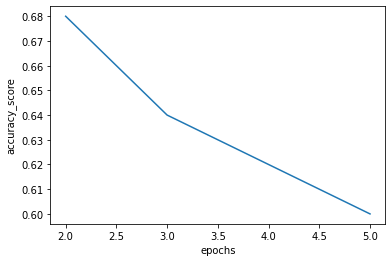

In [0]:
f1 = [0.64,.62,.58]
acc  = [ 0.68,.64,.60 ]
epoch = [2,3,5]
import matplotlib.pyplot as plt 
  
# plotting the points  
plt.plot(epoch,acc) 
  
# naming the x axis 
plt.xlabel('epochs') 
# naming the y axis 
plt.ylabel('accuracy_score') 
plt.savefig('foo')

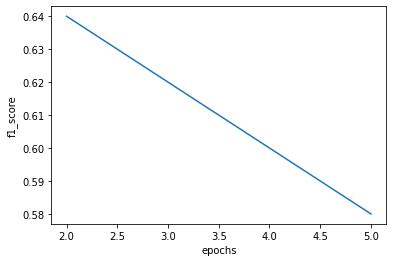

In [0]:
plt.plot(epoch,f1) 
  
# naming the x axis 
plt.xlabel('epochs') 
# naming the y axis 
plt.ylabel('f1_score') 
plt.savefig('foo')